In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

df = pd.read_csv("wine.csv", index_col=['month'], parse_dates=['month'], dayfirst=True, encoding="ISO-8859-1")
print(df.shape)
df.head()



(176, 1)


,sales
month,
1980-01-01,15136
1980-02-01,16733
1980-03-01,20016
1980-04-01,17708
1980-05-01,18019


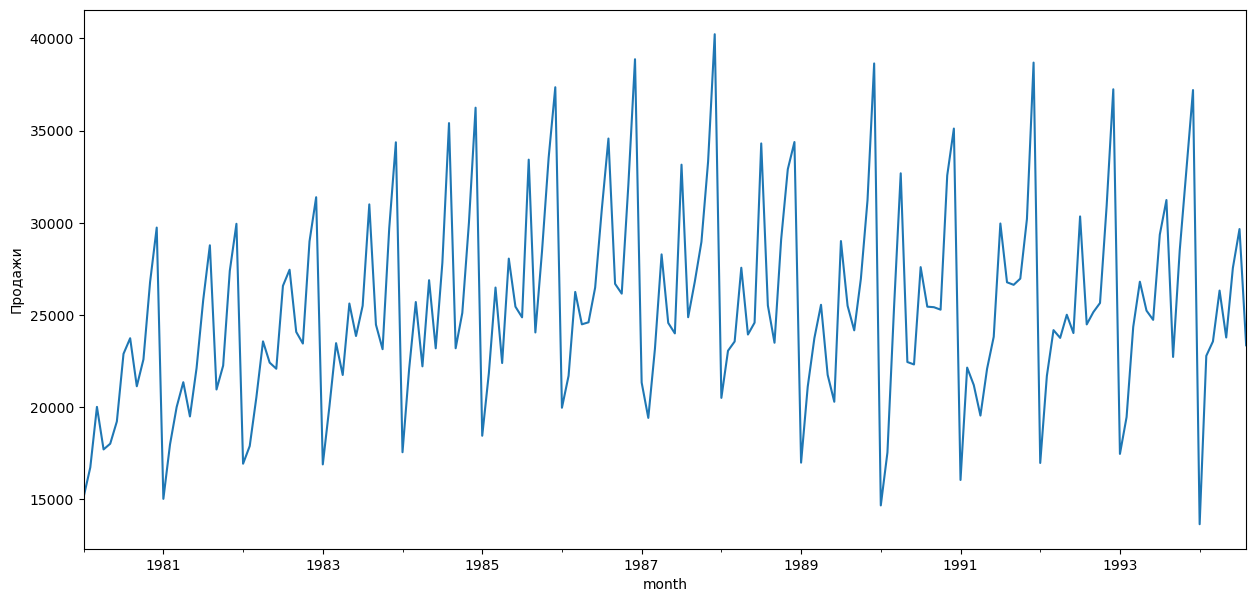

In [9]:
# выведем данные на график
plt.figure(figsize=(15,7))
df['sales'].plot()
plt.ylabel('Продажи')
plt.show()

Критерий Дики-Фуллера: p=0.051161


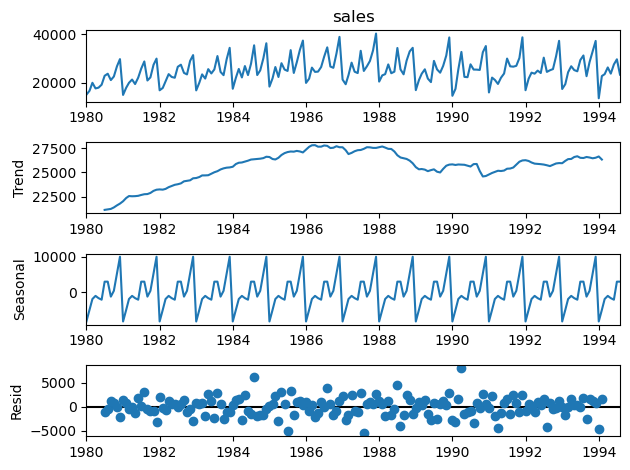

In [11]:
# Проверьте стационарность ряда
sm.tsa.seasonal_decompose(df['sales']).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['sales'])[1])

По критерию Дики-Фуллера гипотеза о нестационарности ряда не отвергается. Значение 0.051161 больше порога 0.05.
Хотя в лабораторной написано что отвергается, но визуально видно тренд
Немного видны следующие особенности данных:
возрастающий тренд
Не очень стабильная дисперсия (В начале в течение года данные не очень сильно изменялись. А под конец максимальный замер уже отличается от минимального)
Сезонность (Замеры раз в 12 месяцев сильно похожи друг на друга. Например, пики на графики были записаны в один и тот же месяц)
заметная структура остатков

Сделаем преобразование Бокса-Кокса для стабилизации дисперсии:

Оптимальный параметр преобразования Бокса-Кокса: 0.236675
Критерий Дики-Фуллера: p=0.029565


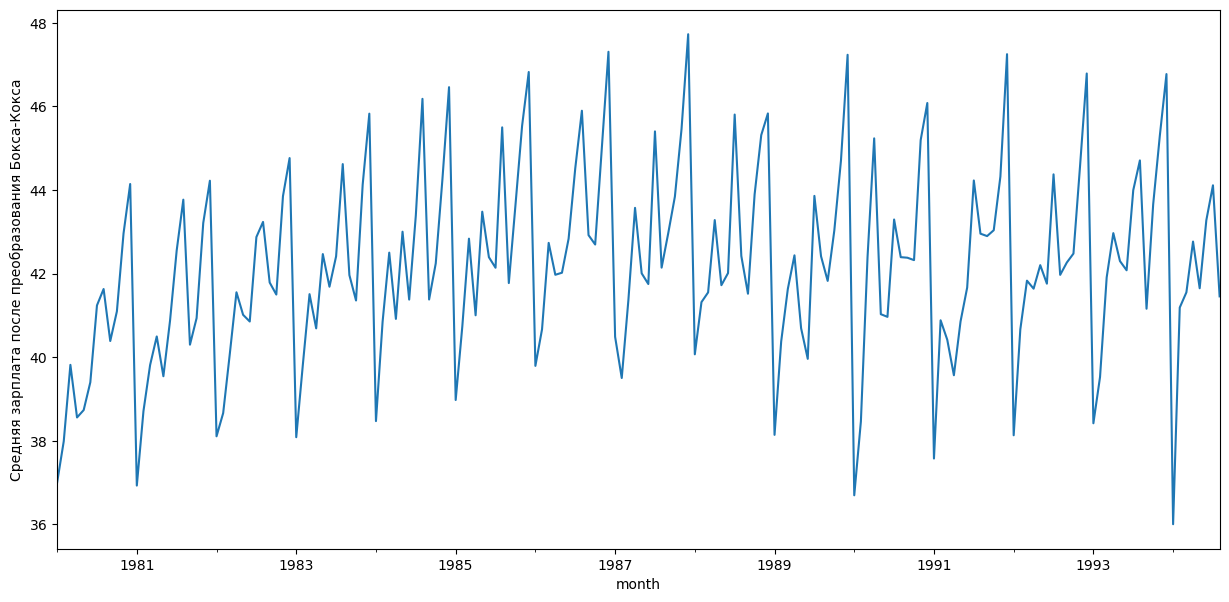

In [12]:
df['sales_box'], lmbda = stats.boxcox(df['sales'])
plt.figure(figsize=(15,7))
df['sales_box'].plot()
plt.ylabel(u'Средняя зарплата после преобразования Бокса-Кокса')
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['sales_box'])[1])

Выведем сразу два графика - оригинальный и после Кокса-Бокса:

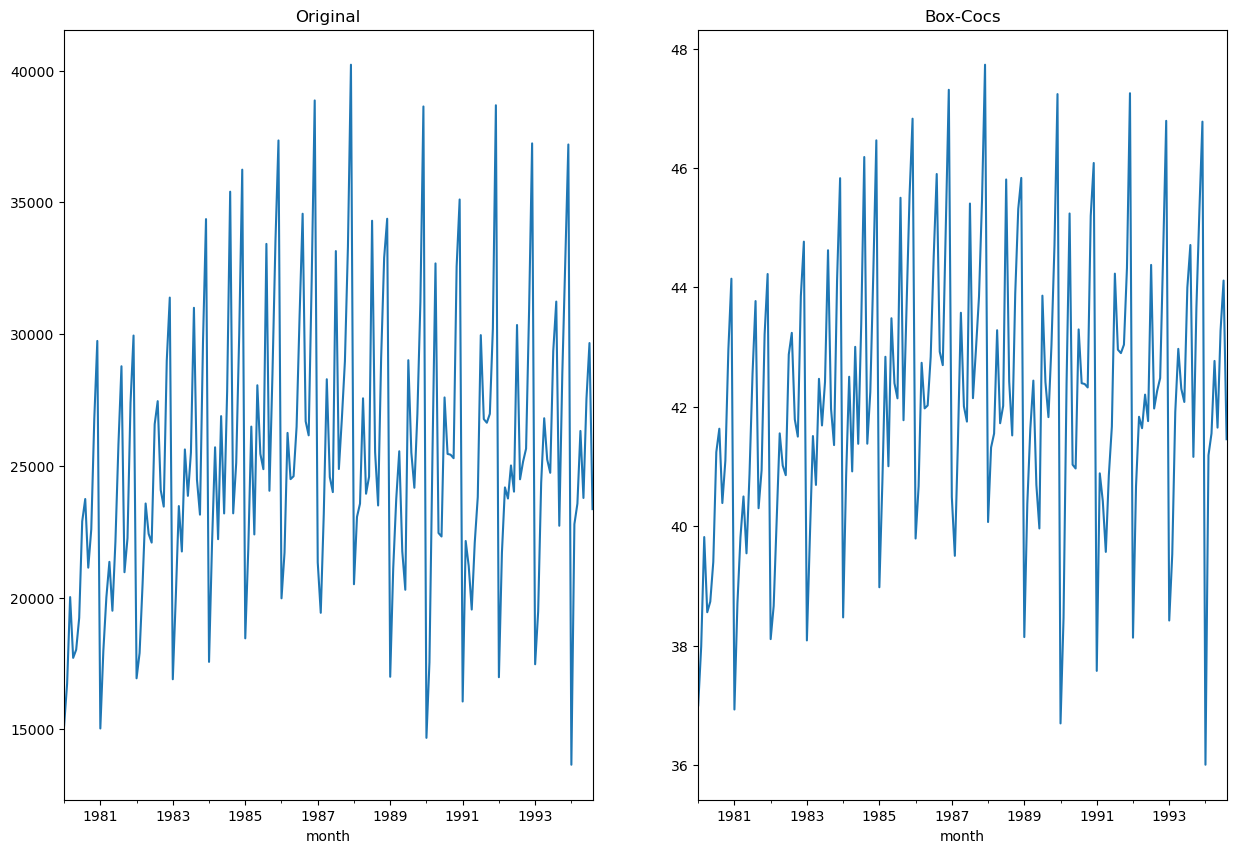

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

df['sales'].plot(kind='line', ax=ax[0])
df['sales_box'].plot(kind='line', ax=ax[1])

ax[0].set_title('Original')
ax[1].set_title('Box-Cocs')

plt.show()